In [2]:
import pandas as pd

# plot imports
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

# model imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# imports for model saving
import joblib
import os
import json

# flag for github plotting
github = True

try: 
    os.mkdir('images')
except:
    print("Folder already exists")

Folder already exists


In [3]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [4]:
# unique labels
data['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [4]:
# train/validation/test split
training, test = train_test_split(data, stratify=data['label'], train_size=0.8, random_state=1)

# brief description of data
training.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,119.484055,57.108750,0.376907,0.129284,2189.944752,2234.739807,4546.274295,0.103157,-146.007271,100.097295,...,-6.100218,4.411678,-5.036521,1.691537,-4.035266,1.059600,-4.006248,0.575572,-2.326338,-1.100495
std,28.449733,14.311899,0.081084,0.065149,714.745631,524.427180,1577.696557,0.041956,100.202811,31.050630,...,6.752308,6.846145,6.099127,5.048913,4.899209,4.582912,4.552404,3.890221,3.831166,3.984577
min,58.726918,18.000000,0.171782,0.006633,569.930721,897.994319,927.427725,0.021701,-552.064063,-1.527148,...,-28.052265,-13.037723,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.719264,-18.504188,-19.935203
25%,99.384014,47.000000,0.318384,0.084434,1610.118941,1899.150860,3362.096337,0.070149,-203.054203,77.759380,...,-11.093326,-0.591647,-9.719689,-1.781769,-7.521035,-1.891221,-7.349810,-1.875457,-4.637902,-3.415269
50%,117.453835,56.000000,0.380206,0.119086,2187.923728,2215.641897,4596.672205,0.099425,-122.013112,99.180470,...,-6.123948,3.787022,-4.457031,1.652400,-3.756985,1.072064,-4.131125,0.721823,-2.390766,-1.194143
75%,135.999178,65.000000,0.434354,0.172846,2677.566081,2565.933303,5488.185564,0.131658,-74.085276,120.547399,...,-1.123614,9.712923,-0.524416,5.206192,-0.371713,4.182973,-0.842968,3.212514,0.137674,1.329664
max,234.907670,117.000000,0.636205,0.398012,4275.546426,3509.578677,8676.405868,0.274829,24.490849,193.096518,...,17.421038,23.037571,10.545024,15.288284,12.357588,13.468803,11.489994,14.183652,14.686910,15.368966


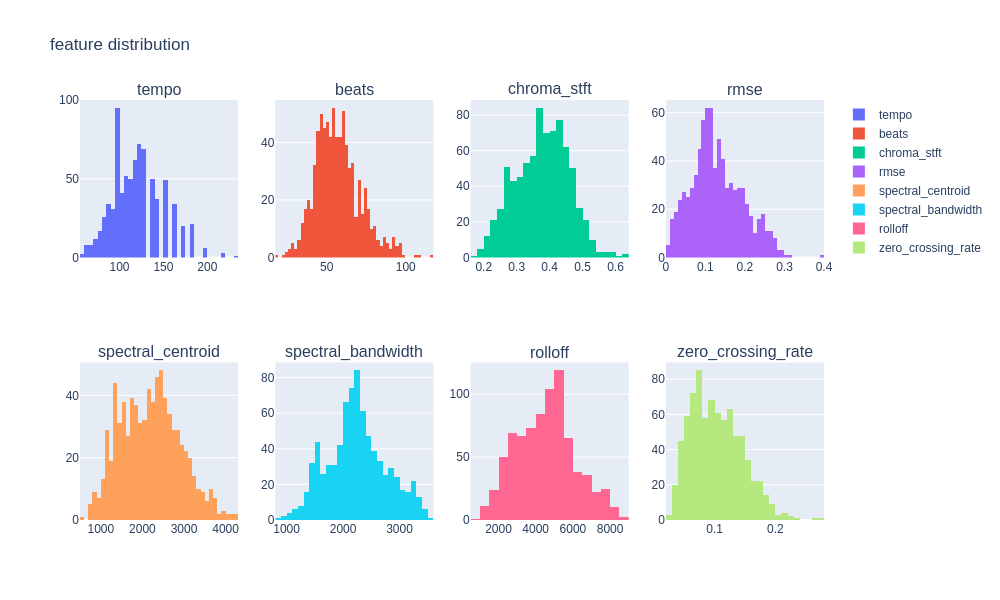

In [5]:

features = ['tempo', 'beats', 'chroma_stft', 'rmse',
            'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']

# plotting of 4 first variables
fig = make_subplots(cols=4, rows=2, subplot_titles=features)

for i, feature in enumerate(features):
    fig.add_trace(go.Histogram(x=training[feature], name=feature), row=i//4 + 1, col=i%4 + 1)

width = 1000
height = 600

fig.update_layout(width=width, height=height, title='feature distribution')

if github:
    fig.show('png', width=width, height=height)
else:
    fig.show()

fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))


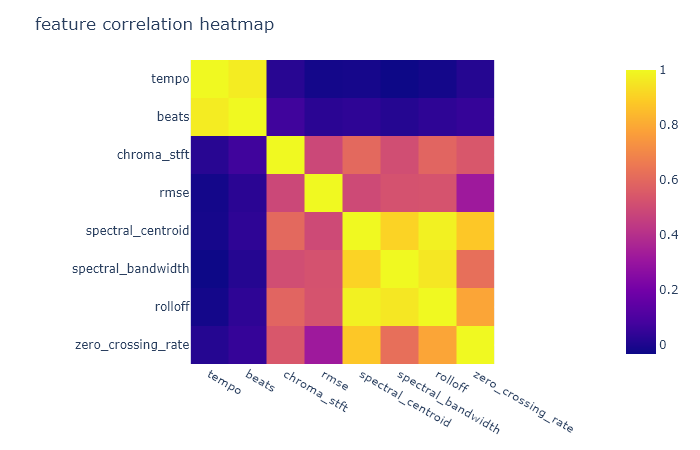

In [50]:
# heatmap of correlation between features
fig = px.imshow(training[features].corr())

fig.update_layout(title='feature correlation heatmap')

if github:
    fig.show('png')
else:
    fig.show()

fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))


As can be seen above, there are several features that are highly correlated to each other. `spectral_bandwidth`, `rolloff` and `zero_crossing_rate` all share high correlation with `spectral_centroid`, and `beats` is highly correlated with `tempo`; some of these features will therefore be removed.

In [51]:
# drop spectral_bandwidth, rolloff, zero_crossing_rate and beats
training.drop(columns=['spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'beats'], inplace=True)
test.drop(columns=['spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'beats'], inplace=True)


# Feature exploring
Now, we will investigate the features we're going to be working on. For that purpose, we'll plot the kernel density estimation across different target classes, as well as give a brief description of each feature.

It is important to note that the vertical axis on the plots represents the density of the variable being plotted; this means that the scale will be influenced by the range of each variable.

## Tempo
The `tempo` feature tells us the rhythm of a song. The higher the value, the fastest the song plays.

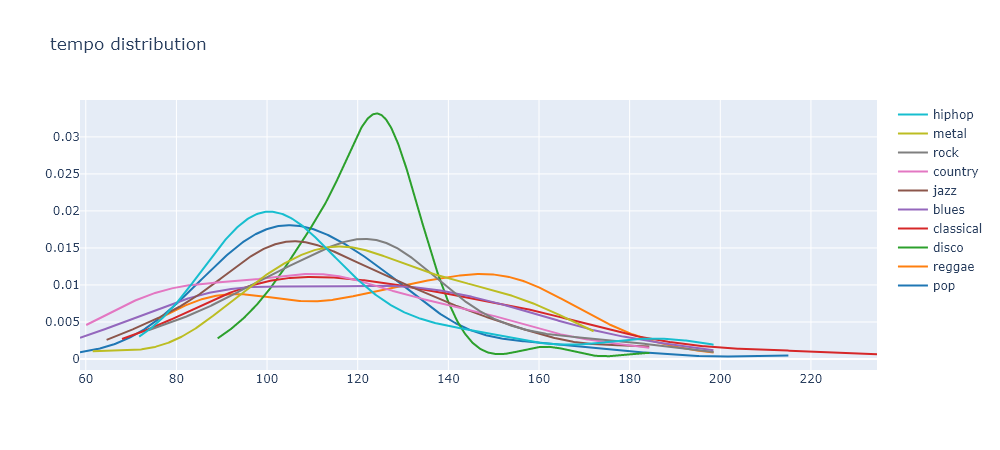

In [52]:
genres = training['label'].unique()

feature='tempo'
fig = ff.create_distplot(
    hist_data=[training[feature].loc[training['label'] == genre] for genre in genres],
    group_labels=genres, show_hist=False, show_rug=False
)

width = 1000

fig.update_layout(width=width, title=f'{feature} distribution')

if github:
    fig.show('png', width=width)
else:
    fig.show()

fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))

## chroma_stft
The `chroma_stft` feature represents the [Short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) of each song. This feature is however reduced to a single value, and the dataset doesn't include an explanation of what it represents (the complete Fourier transform would have a single value for every frequency, representing the contribution of that frequency to the entirety of the song). Given the range of values present in the dataset, we can assume they correspond to the proportion of the dominant frequency in each song.

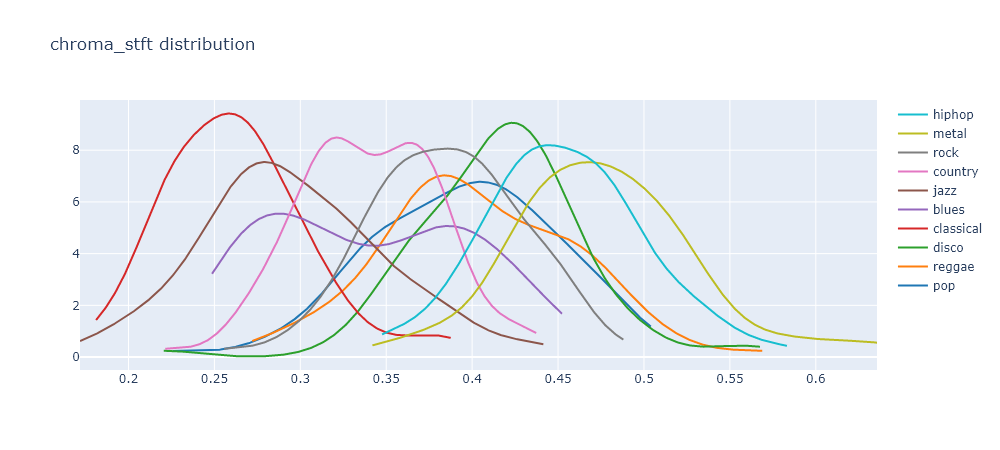

In [53]:
feature='chroma_stft'
fig = ff.create_distplot(
    hist_data=[training[feature].loc[training['label'] == genre] for genre in genres],
    group_labels=genres, show_hist=False, show_rug=False
)

width = 1000

fig.update_layout(width=width, title=f'{feature} distribution')

if github:
    fig.show('png', width=width)
else:
    fig.show()

fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))

## rmse

`rmse` stands for [root mean square energy](https://musicinformationretrieval.com/energy.html#:~:text=The%20root%2Dmean%2Dsquare%20energy,x%2C%20sr%20%3D%20librosa) and represents the total amount of energy in a given signal.

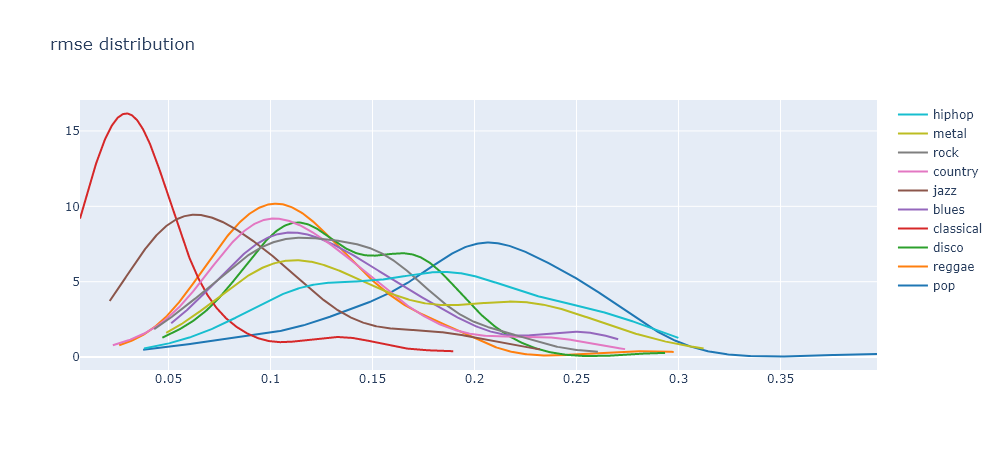

In [54]:
feature='rmse'
fig = ff.create_distplot(
    hist_data=[training[feature].loc[training['label'] == genre] for genre in genres],
    group_labels=genres, show_hist=False, show_rug=False
)

width = 1000

fig.update_layout(width=width, title=f'{feature} distribution')

if github:
    fig.show('png', width=width)
else:
    fig.show()

fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))

## spectral_centroid

The `spectral_centroid` [property](https://en.wikipedia.org/wiki/Spectral_centroid) indicates the frequency that corresponds to the center of mass of a signal.

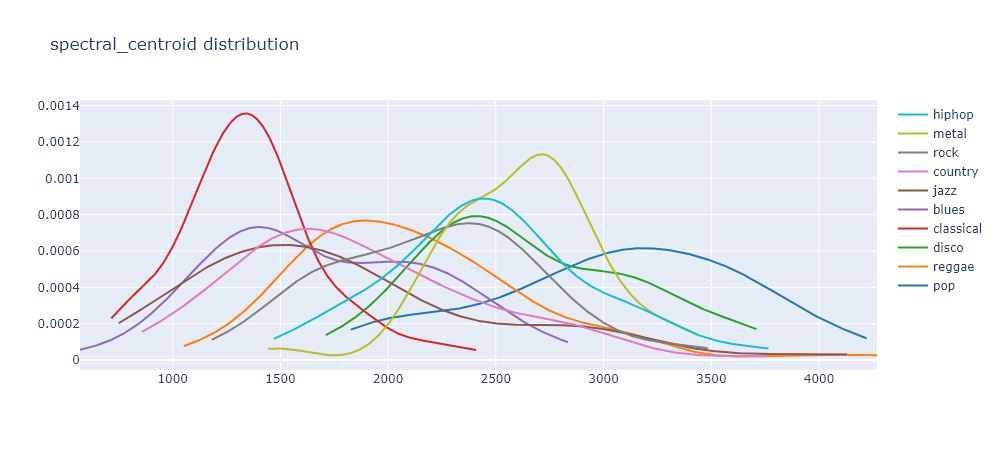

In [55]:
feature='spectral_centroid'
fig = ff.create_distplot(
    hist_data=[training[feature].loc[training['label'] == genre] for genre in genres],
    group_labels=genres, show_hist=False, show_rug=False
)

width = 1000

fig.update_layout(width=width, title=f'{feature} distribution')

if github:
    fig.show('png', width=width)
else:
    fig.show()

fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))

The plots above show us that the features `tempo`, `chroma_stft`, `rmse` and `spectral_centroid` all have significant differences in distriburion across the different target classes; thus, they are going to be useful in helping us build models to predict music genre.

## MFCC coefficients

MFCCs stands for [mel-frequency cepstral coefficients](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) and collectively make up an MFC (mel-frequency cepstrum). In our dataset there are 20 MFCC's. The correlation between each pair will be plotted bellow.

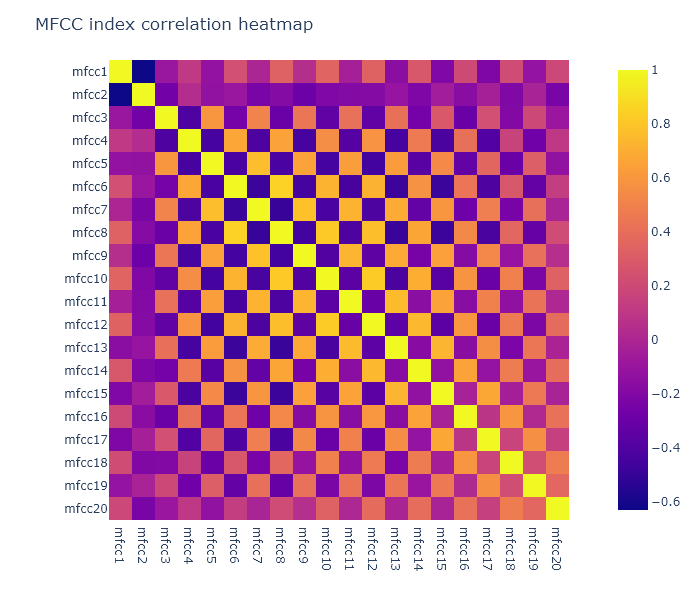

In [57]:
mfcc = [f'mfcc{x}' for x in range(1, 21)]

# heatmap of correlation between MFCC indexes
fig = px.imshow(training[mfcc].corr(), width=700, height=600)

width = 700
height = 600

fig.update_layout(width=width, height=height, title='MFCC index correlation heatmap')

if github:
    fig.show('png', width=width, height=height)
else:
    fig.show()

fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))

By observing the plot above we can see a high correlation in groups of odd and even coefficients, excluding the first and second MFCC's. To reduce the dimensionality of this feature, we will apply the PCA method to reduce the numbers of both odd and even MFCC's.

In [65]:
odd_mfcc = [f'mfcc{x}' for x in range(3, 21) if (x % 2 == 1)]
even_mfcc = [f'mfcc{x}' for x in range(3, 21) if (x % 2 == 0)]

# pca transformers
odd_pca = PCA().fit(training[odd_mfcc])
even_pca = PCA().fit(training[even_mfcc])

# pca transformation on training dataset
training_pca_odd_components = odd_pca.transform(training[odd_mfcc])
training_pca_even_components = even_pca.transform(training[even_mfcc])

# pca transformation on test dataset
test_pca_odd_components = odd_pca.transform(test[odd_mfcc])
test_pca_even_components = even_pca.transform(test[even_mfcc])

print(f"Explained variance (on tranining set) of reduced odd MFCC's:")
print(odd_pca.explained_variance_ratio_)
print('\n')

print(f"Explained variance (on tranining set) of reduced even MFCC's:")
print(even_pca.explained_variance_ratio_)

Explained variance (on tranining set) of reduced odd MFCC's:
[0.68552199 0.1823339  0.04741692 0.02504977 0.01711308 0.01659338
 0.01124799 0.00869031 0.00603266]


Explained variance (on tranining set) of reduced even MFCC's:
[0.71564189 0.13864236 0.05718861 0.02319806 0.01853898 0.0147636
 0.01390881 0.00991512 0.00820257]


Following the results above, we can conclude that the majority (roughly 97%) of the information found in groups of odd and even coefficients can be synthesized in the first 3 components; we will keep, however, 7 components from each group, reducing the total number of dimensions from 18 to 14 in order to keep 99% of the information from the features.

In [66]:
n_pca_components = 7

training[[f'reduced_odd_mfcc_{i+1}' for i in range(n_pca_components)]] = training_pca_odd_components[:, :n_pca_components]
training[[f'reduced_even_mfcc_{i+1}' for i in range(n_pca_components)]] = training_pca_even_components[:, :n_pca_components]

test[[f'reduced_odd_mfcc_{i+1}' for i in range(n_pca_components)]] = test_pca_odd_components[:, :n_pca_components]
test[[f'reduced_even_mfcc_{i+1}' for i in range(n_pca_components)]] = test_pca_even_components[:, :n_pca_components]



## Exploring newly created features

Now we will further explore our new features, as well as the original `mfcc1` and `mfcc2`, by plotting their distribution across the dataset and also across the different labels.

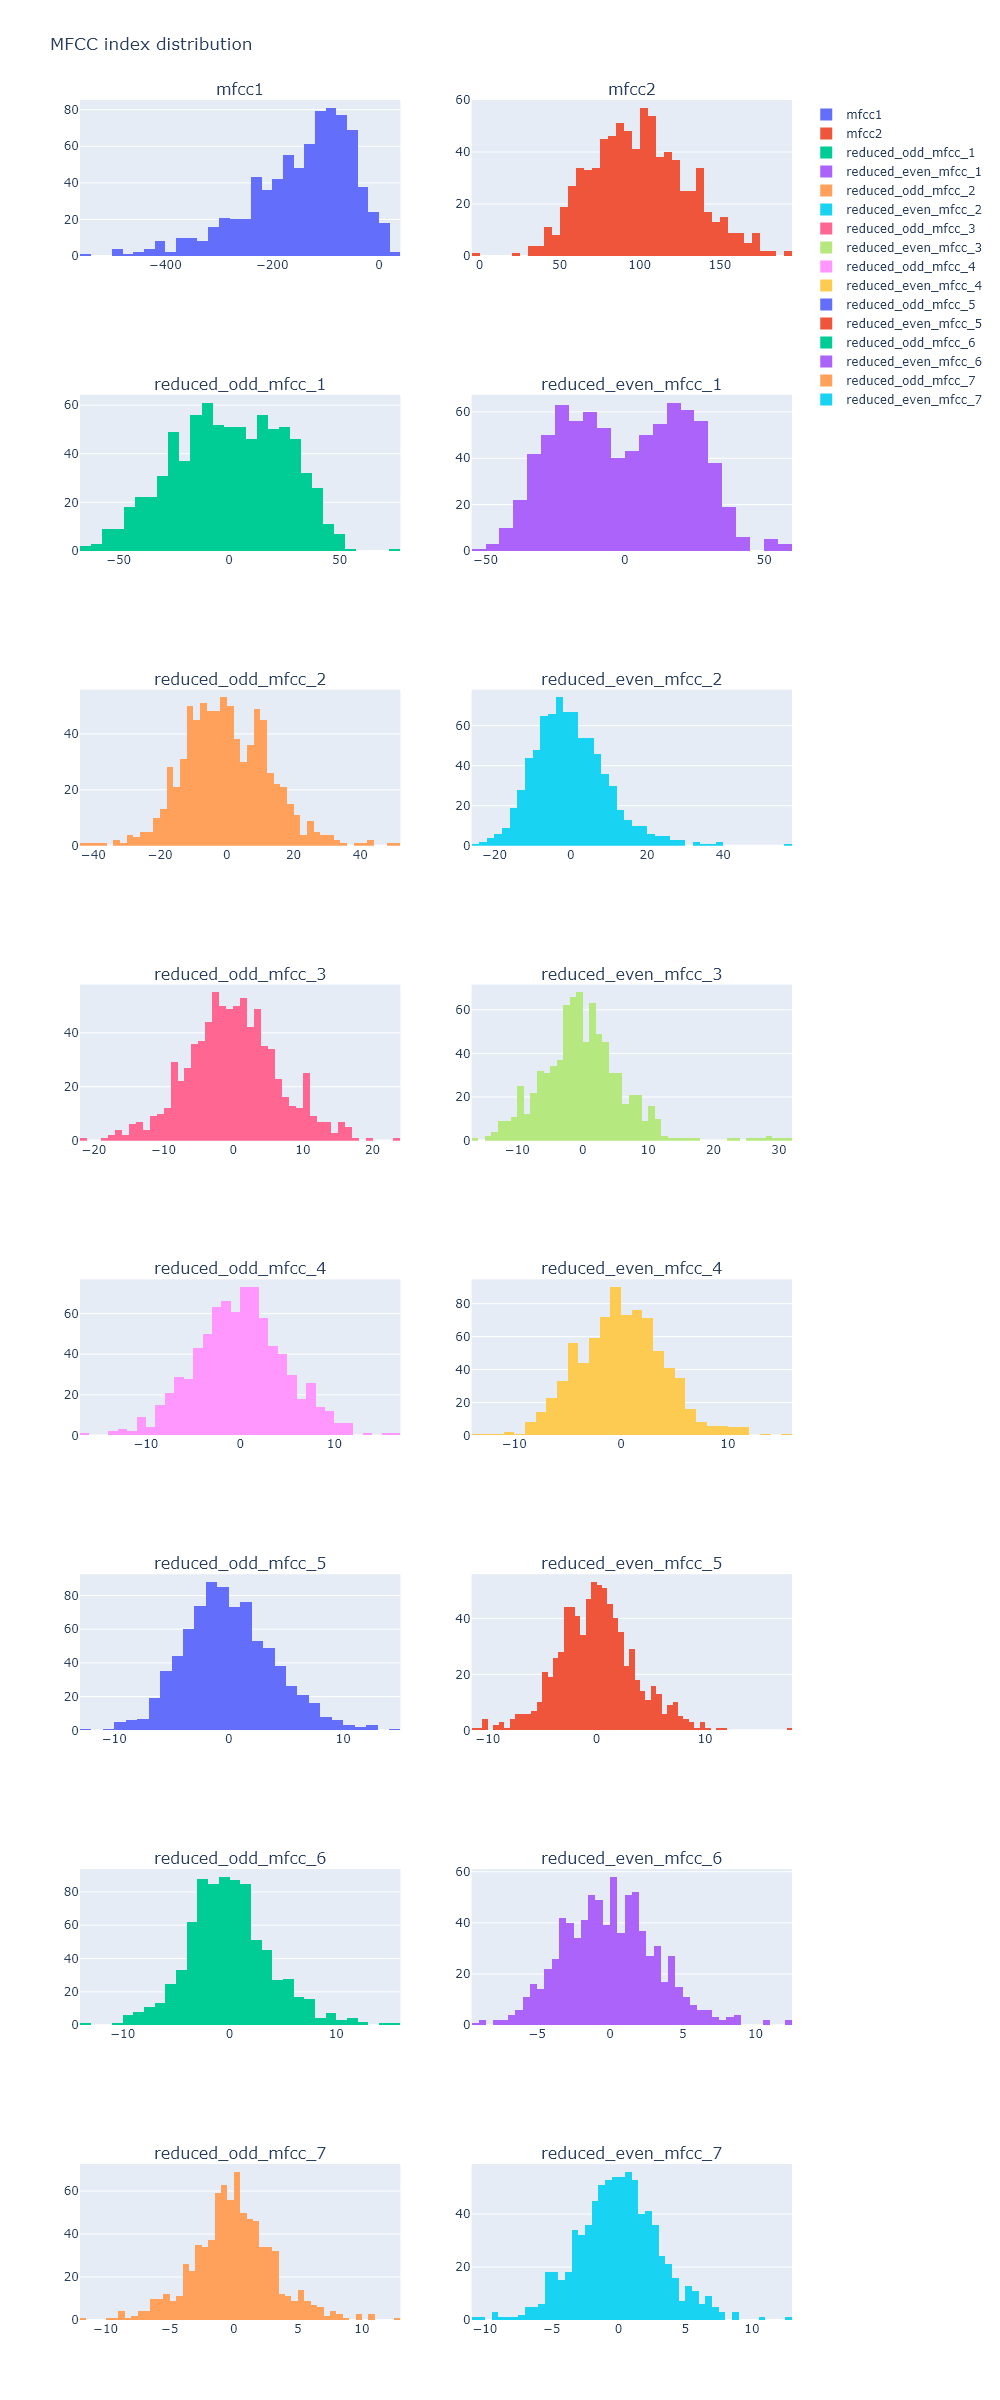

In [68]:
to_plot = ['mfcc1', 'mfcc2']
for i in range(n_pca_components):
    to_plot.extend([f'reduced_odd_mfcc_{i+1}', f'reduced_even_mfcc_{i+1}'])

# plotting of 4 first variables
fig = make_subplots(cols=2, rows=round(len(to_plot)/2), subplot_titles=to_plot)

for i, feature in enumerate(to_plot):
    fig.add_trace(go.Histogram(x=training[feature], name=feature), row=int(i/2)+1, col=(i%2)+1)

width = 1000
height = 300*round(len(to_plot)/2)

fig.update_layout(width=width, height=height, title='MFCC index distribution')

if github:
    fig.show('png', width=width, height=height)
else:
    fig.show()

fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))


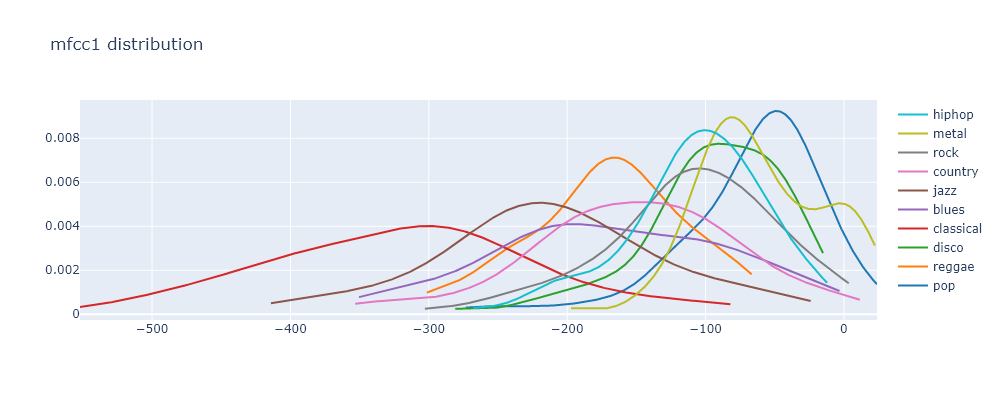

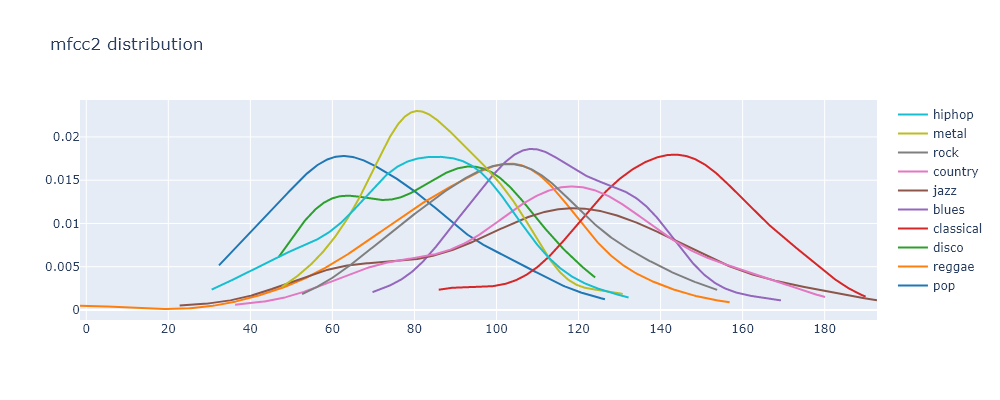

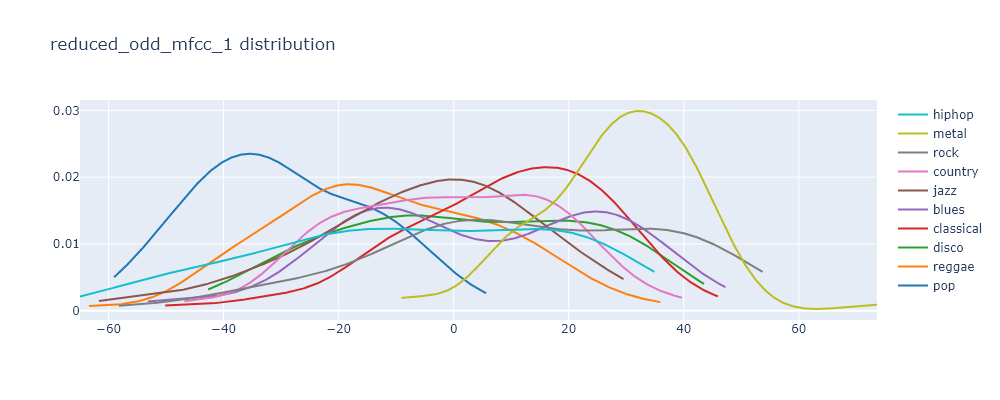

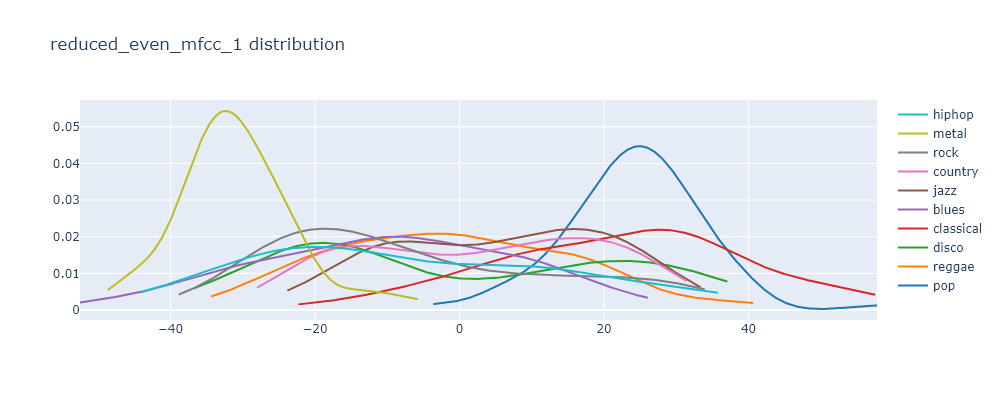

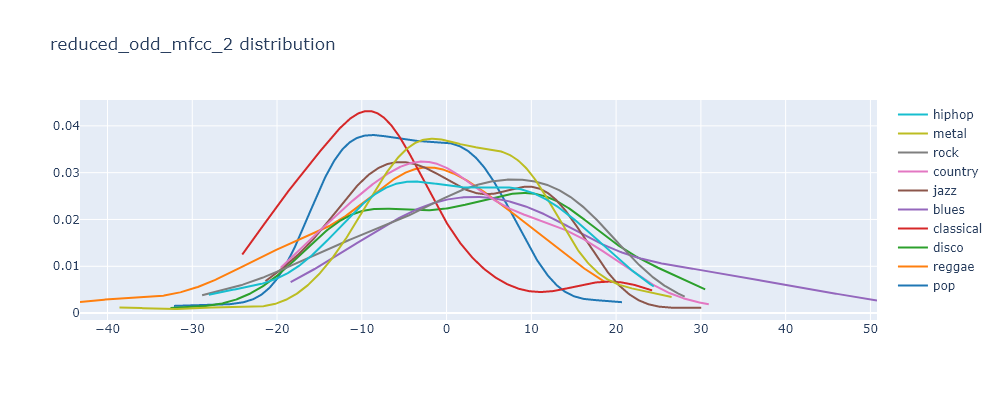

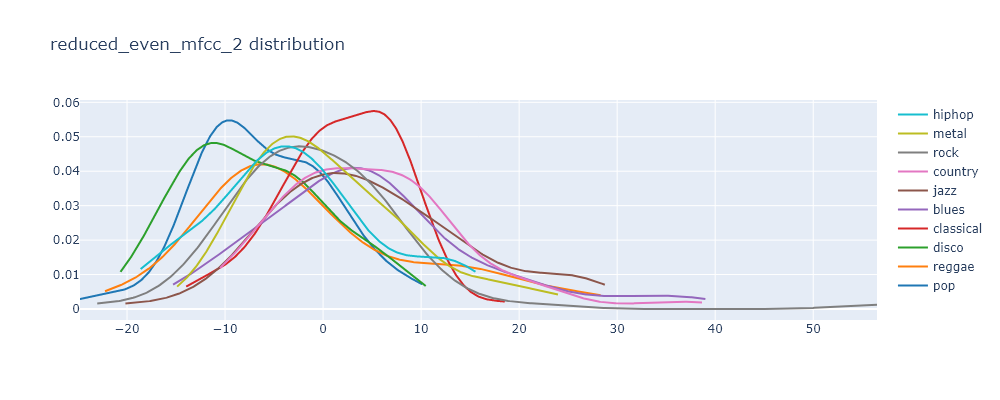

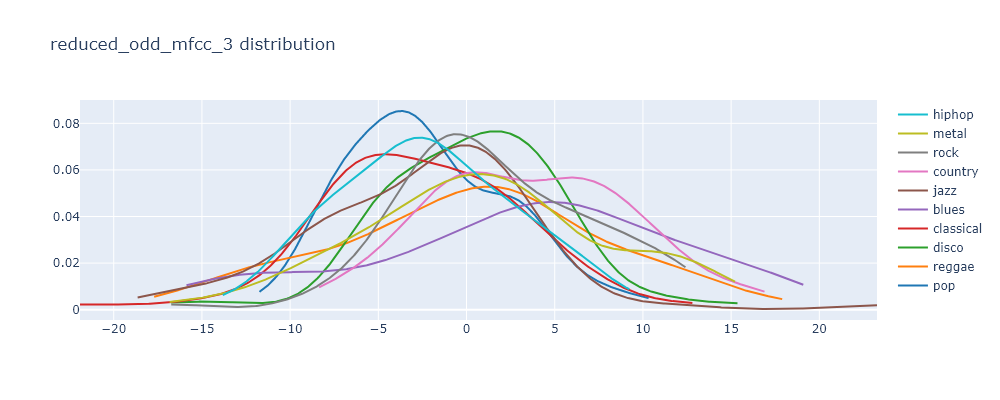

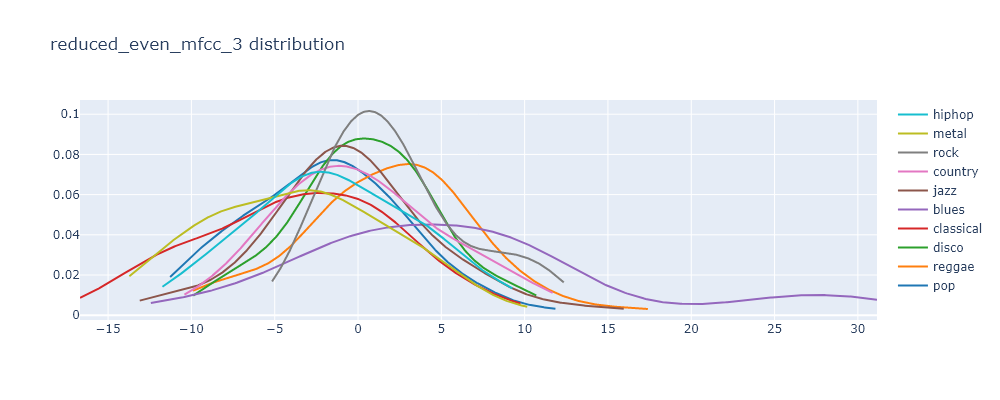

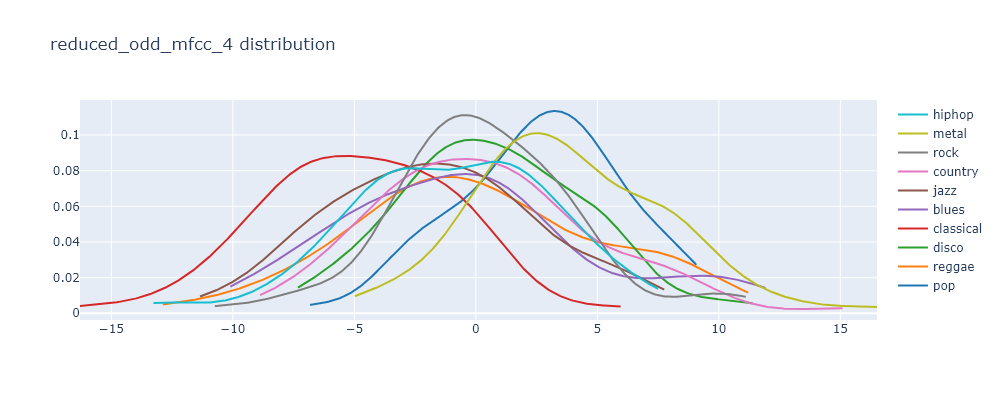

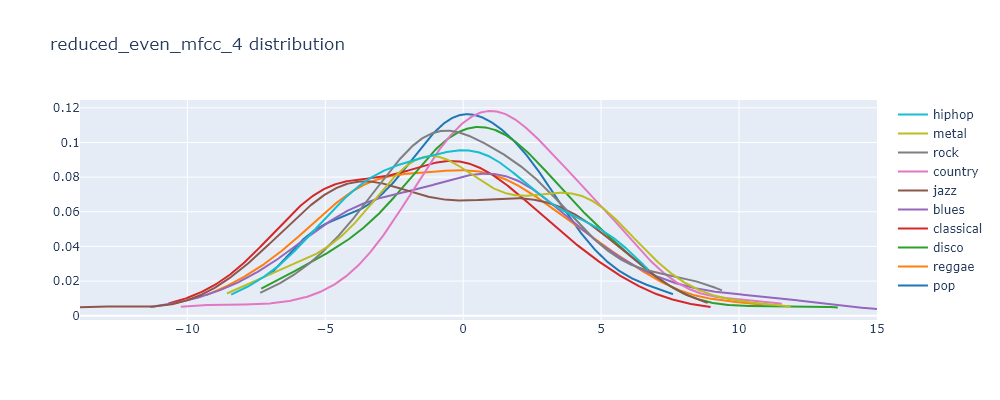

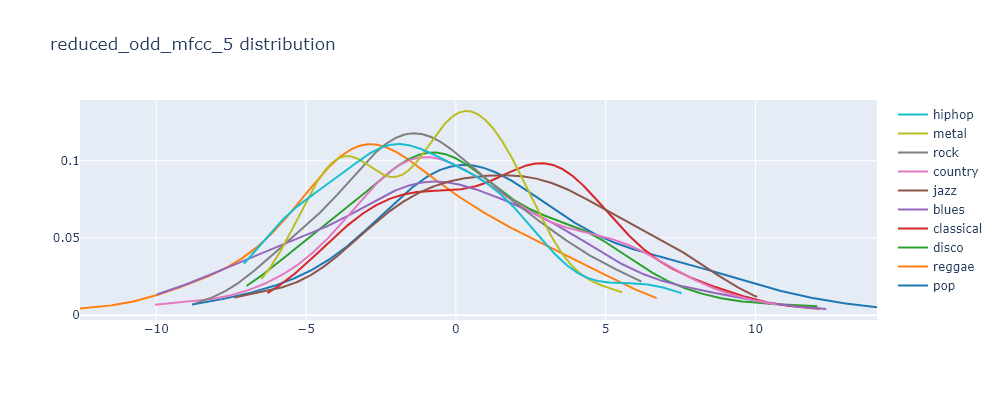

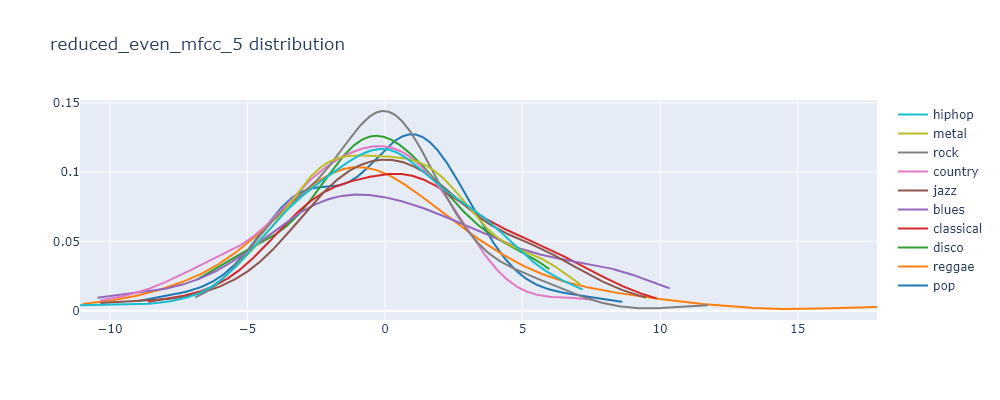

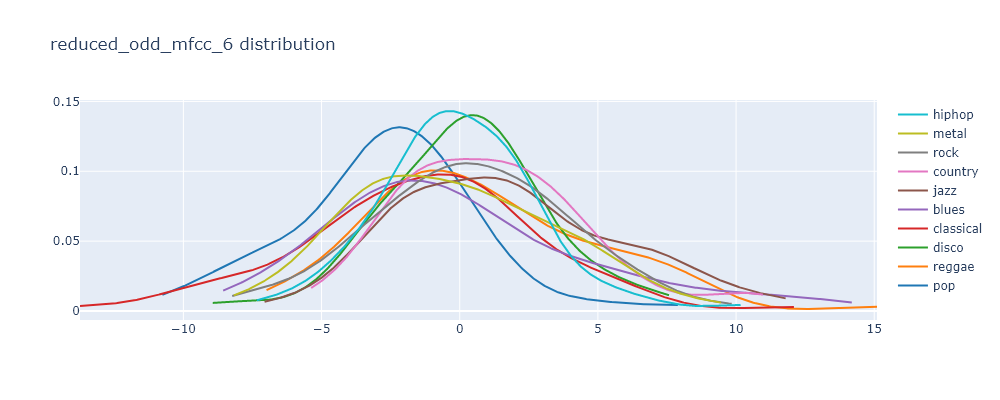

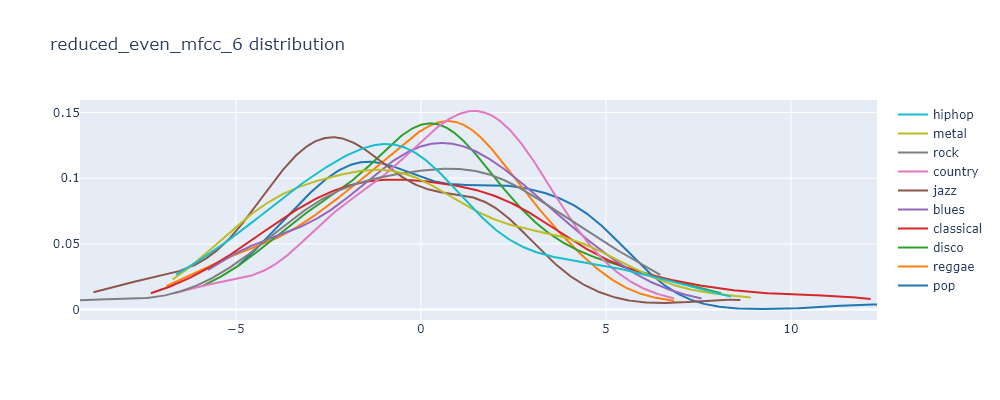

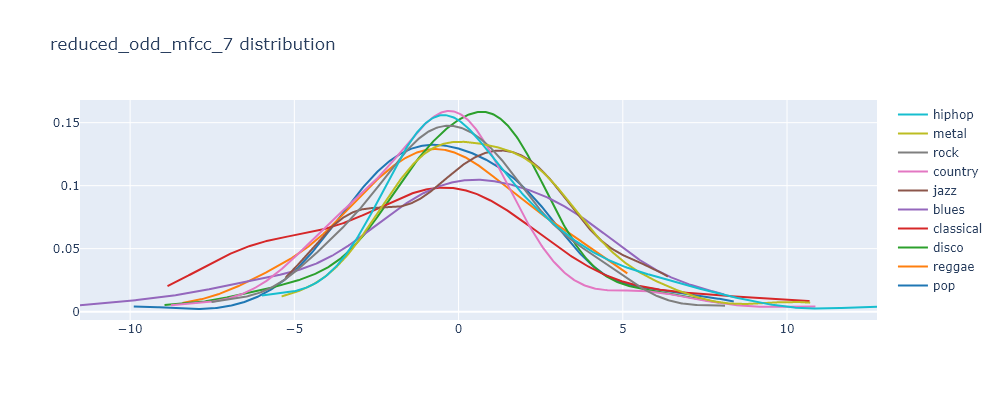

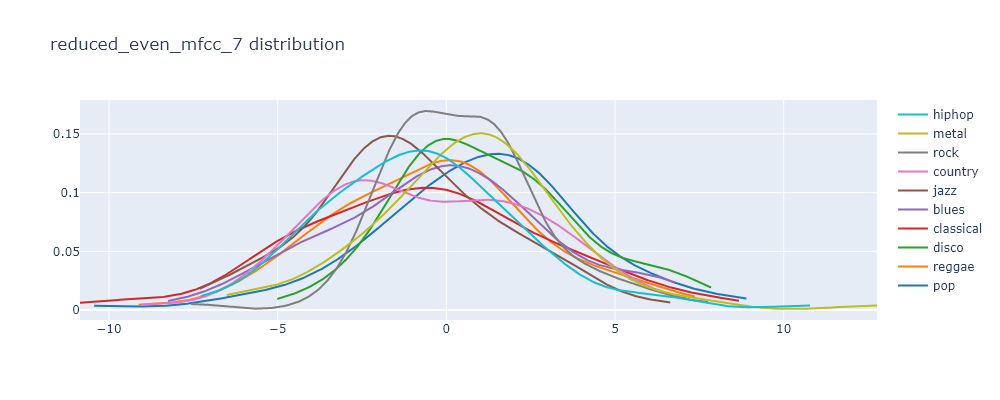

In [69]:
for feature in to_plot:
    fig = ff.create_distplot(
        hist_data=[training[feature].loc[training['label'] == genre] for genre in genres],
        group_labels=genres, show_hist=False, show_rug=False
    )
    
    width = 1000
    height = 400

    fig.update_layout(width=width, height=height, title=f'{feature} distribution')

    if github:
        fig.show('png', width=width, height=height)
    else:
        fig.show()

    fig.write_image(os.path.join('images', fig.layout['title']['text'] + '.png'))

## Standardization of features

Now, we will standardize the features (including those we created above) so they can have no mean and unit standard deviation.

In [16]:
# fitting of scaler

features = ['tempo', 'chroma_stft', 'rmse', 'spectral_centroid', 'mfcc1', 'mfcc2'] + [f'reduced_odd_mfcc_{i+1}' for i in range(n_pca_components)] + [f'reduced_even_mfcc_{i+1}' for i in range(n_pca_components)]

scaler = StandardScaler()
scaler.fit(training[features].values)


training[features] = scaler.transform(training[features].values)
test[features] = scaler.transform(test[features].values)

## Fitting a Naive Bayes model

In order to have a baseline for our predictive models, we will fit a simple gaussian naive bayes model and see how it performs. After that, we will train different kinds of models and compare them.

In [17]:
from sklearn.naive_bayes import GaussianNB

# fitting the model with the training data
gnb = GaussianNB()

gnb_scores = cross_val_score(gnb, training[features], training['label'], cv=5)

print(f'The Naive Bayes model achieved an average accuracy of {gnb_scores.mean()}.')

The Naive Bayes model achieved an average accuracy of 0.5337500000000001.


As can be seen above, the model achieved around 50% accuracy.

## Fitting a logistic regression model

In [18]:
from sklearn.linear_model import LogisticRegression

# fitting the linear regression model
mlr = LogisticRegression(multi_class='ovr')

mlr_scores = cross_val_score(mlr, training[features], training['label'], cv=5)

print(f'The logistic regression model achieved an average accuracy of {mlr_scores.mean()}.')

The logistic regression model achieved an average accuracy of 0.5900000000000001.


## Fitting a K-nearest neighbors classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc_scores = cross_val_score(knc, training[features], training['label'], cv=5)

print(f'The K-nearest neighbors model achieved an average accuracy of {knc_scores.mean()}.')

The K-nearest neighbors model achieved an average accuracy of 0.5575.


## Fitting a Decision Tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc_scores = cross_val_score(dtc, training[features], training['label'], cv=5)

print(f'The Decision Tree classifier achieved an average accuracy of {dtc_scores.mean()}.')

The Decision Tree classifier achieved an average accuracy of 0.47000000000000003.


## Fitting a Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc_scores = cross_val_score(rfc, training[features], training['label'], cv=5)

print(f'The Random Forest classifier achieved an average accuracy of {rfc_scores.mean()}.')

The Random Forest classifier achieved an average accuracy of 0.62625.


## Fitting a Support Vector Classifier

In [22]:
from sklearn.svm import SVC

svc = SVC()

svc_scores = cross_val_score(svc, training[features], training['label'], cv=5)

print(f'The Support Vector classifier achieved an average accuracy of {svc_scores.mean()}.')

The Support Vector classifier achieved an average accuracy of 0.6375.


## Fitting an Gradient Boosting Classifier

In [23]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(verbosity=0)

xgbc_scores = cross_val_score(xgbc, training[features], training['label'], cv=5)

print(f'The Extreme Gradient Boosting classifier achieved an average accuracy of {xgbc_scores.mean()}.')

The Extreme Gradient Boosting classifier achieved an average accuracy of 0.6112500000000001.


## Fitting a Neural Neural Network classifier

In [24]:
from sklearn.neural_network import MLPClassifier

nnc = MLPClassifier(random_state=1)

nnc_scores = cross_val_score(nnc, training[features], training['label'], cv=5)

print(f'The Neural Network classifier achieved an average accuracy of {nnc_scores.mean()}.')

The Neural Network classifier achieved an average accuracy of 0.63125.


Of all the models trained, we will fine-tune only the 4 with the best score: the random forest, the support vector, the gradient boosting and the neural network classifiers.

In [25]:
# creation of folder that will contain the models
try:
    os.mkdir('models')
except:
    print('Folder already exists')

Folder already exists


In [26]:
# wide search for random forest classifier

rfc = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [20, 50, 100, 150, 200, 300, 500, 700, 1000],
    'max_depth': [None, 2, 5, 10, 15, 20, 30],
    'min_samples_split': [1, 2, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

random_search_rfc = RandomizedSearchCV(rfc, param_grid, n_iter=64, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=1)

random_search_rfc.fit(training[features], training['label'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   35.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=64, n_jobs=-1,
                   param_distributions={'max_depth': [None, 2, 5, 10, 15, 20,
                                                      30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [1, 2, 4, 5, 10],
                                        'n_estimators': [20, 50, 100, 150, 200,
                                                         300, 500, 700, 1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [27]:
print("Best hyperparameters found in wide randomized search for Random Forest Classifier:")
print(random_search_rfc.best_params_)
print('\n')
print('Best accuracy:')
print(random_search_rfc.best_score_)

Best hyperparameters found in wide randomized search for Random Forest Classifier:
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


Best accuracy:
0.63


In [28]:
# narrow search for random forest classifier

rfc = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [1000, 1100, 1200, 1300, 1400, 1500, 2000],
    'max_depth': [None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

grid_search_rfc = GridSearchCV(rfc, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

grid_search_rfc.fit(training[features], training['label'])

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   28.2s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2, 4],
                         'n_estimators': [1000, 1100, 1200, 1300, 1400, 1500,
                                          2000]},
             scoring='accuracy', verbose=1)

In [29]:
print("Best hyperparameters found in narrow grid search for Random Forest Classifier:")
print(grid_search_rfc.best_params_)
print('\n')
print('Best accuracy:')
print(grid_search_rfc.best_score_)

Best hyperparameters found in narrow grid search for Random Forest Classifier:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}


Best accuracy:
0.64125


In [61]:
# saves the best model
folder = 'models/random_forest_classifier'
try:
    os.mkdir(folder)
except:
    print('Folder already exists')

# save best random forest model
joblib.dump(grid_search_rfc.best_estimator_, os.path.join(folder, 'model.sav'))

with open(os.path.join(folder, 'config.json'), 'w') as json_file:

    # save best parameters and best score in json file
    json.dump(
        {
            'best_paramters': grid_search_rfc.best_params_,
            'best_score': grid_search_rfc.best_score_
        },
        json_file, 
        indent=4
    )
  

Folder already exists


In [31]:
# wide search for support vector classifier

svc = SVC(probability = True)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 2, 5, 10, 50, 100, 1000],
    'degree': [1, 2, 3, 4, 5, 6],
    'gamma': ['scale', 'auto', 0.1, 0.5, 1, 1.5, 2, 3, 4, 5]
}
random_search_svc = RandomizedSearchCV(svc, param_grid, n_iter=128, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=1)
random_search_svc.fit(training[features], training['label'])

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_iter=128, n_jobs=-1,
                   param_distributions={'C': [1, 2, 5, 10, 50, 100, 1000],
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'gamma': ['scale', 'auto', 0.1, 0.5, 1,
                                                  1.5, 2, 3, 4, 5],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=1, scoring='accuracy', verbose=1)

In [32]:
print("Best hyperparameters found in wide randomized search for Support Vector Classifier:")
print(random_search_svc.best_params_)
print('\n')
print('Best accuracy:')
print(random_search_svc.best_score_)

Best hyperparameters found in wide randomized search for Support Vector Classifier:
{'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 5}


Best accuracy:
0.6475


In [33]:
# narrow search for support vector classifier

svc = SVC(probability = True)
param_grid = {
    'kernel': ['rbf'],
    'C': [4, 5, 6],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 0.2]
}

grid_search_svc = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_svc.fit(training[features], training['label'])

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 194 out of 225 | elapsed:    2.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [4, 5, 6], 'degree': [3, 4, 5],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 0.2],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [34]:
print("Best hyperparameters found in narrow grid search for Support Vector Classifier:")
print(grid_search_svc.best_params_)
print('\n')
print('Best accuracy:')
print(grid_search_svc.best_score_)

Best hyperparameters found in narrow grid search for Support Vector Classifier:
{'C': 4, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}


Best accuracy:
0.655


In [62]:
# saves the best model
folder = 'models/support_vector_classifier'
try:
    os.mkdir(folder)
except:
    print('Folder already exists')

# save best random forest model
joblib.dump(grid_search_svc.best_estimator_, os.path.join(folder, 'model.sav'))

with open(os.path.join(folder, 'config.json'), 'w') as json_file:

    # save best parameters and best score in json file
    json.dump(
        {
            'best_paramters': grid_search_svc.best_params_,
            'best_score': grid_search_svc.best_score_
        },
        json_file, 
        indent=4
    )

In [36]:
# wide search for extreme boosting gradient classifier

xgbc = XGBClassifier(verbosity=0, random_state=1)

param_grid = {
    'n_estimators': [100, 200, 500, 600 ,700, 800, 1000],
    'max_depth': [None, 2, 3, 5, 10, 15, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 0.7],
    'gamma': [0, 0.1, 1, 10, 100],
    'min_child_weight': [0, 0.1, 0.5, 1, 10, 100],
    'col_sample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

random_search_xgbc = RandomizedSearchCV(xgbc, param_grid, n_iter=64, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=1)
random_search_xgbc.fit(training[features], training['label'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   n_iter=64, n_jobs=-1,
                   param_distributions={'col_sample_bytree': [0.2, 0.4, 0.6,
                                                              0

In [63]:
print("Best hyperparameters found in wide radomized search for Gradient Boosting Classifier:")
print(random_search_xgbc.best_params_)
print('\n')
print('Best accuracy:')
print(random_search_xgbc.best_score_)

Best hyperparameters found in wide radomized search for Gradient Boosting Classifier:
{'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 0.1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'col_sample_bytree': 0.6}


Best accuracy:
0.6300000000000001


In [38]:
# narrow search for extreme boosting gradient

xgbc = XGBClassifier(verbosity=0, random_state=1)

param_grid = {
    'n_estimators': [150, 200, 250, 300],
    'max_depth': [3],
    'learning_rate': [0.1],
    'gamma': [0, 0.05, 0.1],
    'min_child_weight': [0.05, 0.1, 0.2, 0.3],
    'col_sample_bytree': [0.5, 0.6, 0.7],
    'reg_alpha': [0],
    'reg_lambda': [1.5]
}

grid_search_xgbc = GridSearchCV(xgbc, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_xgbc.fit(training[features], training['label'])

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  3.2min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=0),
     

In [64]:
print("Best hyperparameters found in narrow grid search for Gradient Boosting Classifier:")
print(grid_search_xgbc.best_params_)
print('\n')
print('Best accuracy:')
print(grid_search_xgbc.best_score_)

Best hyperparameters found in narrow grid search for Gradient Boosting Classifier:
{'col_sample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 0.3, 'n_estimators': 250, 'reg_alpha': 0, 'reg_lambda': 1.5}


Best accuracy:
0.64


In [65]:
# saves the best model
folder = 'models/gradient_boosting_classifier'
try:
    os.mkdir(folder)
except:
    print('Folder already exists')

# save best random forest model
joblib.dump(grid_search_xgbc.best_estimator_, os.path.join(folder, 'model.sav'))

with open(os.path.join(folder, 'config.json'), 'w') as json_file:

    # save best parameters and best score in json file
    json.dump(
        {
            'best_paramters': grid_search_xgbc.best_params_,
            'best_score': grid_search_xgbc.best_score_
        },
        json_file, 
        indent=4
    )

In [41]:
# wide search for neural network

nnc = MLPClassifier(random_state=1, verbose=True)

param_grid = {
    'hidden_layer_sizes': [(10), (15), (20), (50), (100), (10, 10), (15, 15), (20, 20), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': ['auto', 16, 32, 64, 128],
    'learning_rate': ['constant'],  # set to constant because it is only used when sgd is the solver
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300],
    'beta_1': [0.5, 0.7, 0.8, 0.9, 0.99],
    'beta_2': [0.8, 0.9, 0.95, 0.999]
}

random_search_nnc = RandomizedSearchCV(nnc, param_grid, n_iter=512, scoring='accuracy', cv=5, n_jobs=-1, verbose=1, random_state=1)
random_search_nnc.fit(training[features], training['label'])

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=1, verbose=True),
                   n_iter=512, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'batch_size': ['auto', 16, 32, 64, 128],
                                        'beta_1': [0.5, 0.7, 0.8, 0.9, 0.99],
                                        'beta_2': [0.8, 0.9, 0.95, 0.999],
                                        'hidden_layer_sizes': [10, 15, 20, 50,
                                                               100, (10, 10),
                                                               (15, 15),
                                                               (20, 20),
                                                               (100, 100)],
                                        'learning_rate

In [42]:
print("Best hyperparameters found in wide randomized search for Neural Network Classifier:")
print(random_search_nnc.best_params_)
print('\n')
print('Best accuracy:')
print(random_search_nnc.best_score_)

Best hyperparameters found in wide randomized search for Neural Network Classifier:
{'solver': 'lbfgs', 'max_iter': 200, 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (100, 100), 'beta_2': 0.999, 'beta_1': 0.8, 'batch_size': 128, 'alpha': 0.01, 'activation': 'tanh'}


Best accuracy:
0.6475


In [43]:
# narrow search for neural network

nnc = MLPClassifier(random_state=1, verbose=True)

param_grid = {
    'hidden_layer_sizes': [(100, 100), (125, 125), (150, 150), (200, 200)],
    'activation': ['tanh'],
    'solver': ['lbfgs'],
    'alpha': [0.01, 0.02, 0.05, 0.1],
    'batch_size': [128, 160],
    'learning_rate': ['constant'],  # set to constant because it is only used when sgd is the solver
    'learning_rate_init': [0.0005, 0.001, 0.002, 0.005],
    'max_iter': [150, 200, 250],
    'beta_1': [0.75, 0.8, 0.85],
    'beta_2': [0.999]
}

grid_search_nnc = GridSearchCV(nnc, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_nnc.fit(training[features], training['label'])

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 36.2min finished


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1, verbose=True),
             n_jobs=-1,
             param_grid={'activation': ['tanh'],
                         'alpha': [0.01, 0.02, 0.05, 0.1],
                         'batch_size': [128, 160], 'beta_1': [0.75, 0.8, 0.85],
                         'beta_2': [0.999],
                         'hidden_layer_sizes': [(100, 100), (125, 125),
                                                (150, 150), (200, 200)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.0005, 0.001, 0.002, 0.005],
                         'max_iter': [150, 200, 250], 'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [44]:
print("Best hyperparameters found in narrow grid search for Neural Network Classifier:")
print(grid_search_nnc.best_params_)
print('\n')
print('Best accuracy:')
print(grid_search_nnc.best_score_)

Best hyperparameters found in narrow grid search for Neural Network Classifier:
{'activation': 'tanh', 'alpha': 0.05, 'batch_size': 128, 'beta_1': 0.75, 'beta_2': 0.999, 'hidden_layer_sizes': (150, 150), 'learning_rate': 'constant', 'learning_rate_init': 0.0005, 'max_iter': 150, 'solver': 'lbfgs'}


Best accuracy:
0.64875


In [66]:
# saves the best model
folder = 'models/neural_network_classifier'
try:
    os.mkdir(folder)
except:
    print('Folder already exists')

# save best random forest model
joblib.dump(grid_search_nnc.best_estimator_, os.path.join(folder, 'model.sav'))

with open(os.path.join(folder, 'config.json'), 'w') as json_file:

    # save best parameters and best score in json file
    json.dump(
        {
            'best_paramters': grid_search_nnc.best_params_,
            'best_score': grid_search_nnc.best_score_
        },
        json_file, 
        indent=4
    )

## Final Results
Here are the best mean scores using 5-fold cross validation after fine tunning all four models:

| Model | Score|
|:------|:-----|
| Random Forest Classifier    |    0.64125   |
| **Support Vector Classifier**    |    **0.655**   |
| Gradient Boosting Classifier    |    0.64   |
| Neural Network Classifier    |    0.64875   |

The table above shows us that all the algorithms achieved similar scores, with the Support Vector Machine delivering slightly better results; it will be chosen as the final model for predicting music genre and evaluated using the test set.


In [69]:
folder = 'models/support_vector_classifier'

model = joblib.load(os.path.join(folder, 'model.sav'))

final_score = model.score(test[features], test['label'])

print(f'The model achieved an accuracy of {final_score*100}% on the test set.')

The model achieved an accuracy of 68.5% on the test set.


Conclusions

A score of 68.5% was achieved with the chosen support vector classifier model; it is pretty impressive for such an abstract dataset with only 1000 samples to be able to achieve almost 70% of accuracy in predicting music genre from 10 different classes.